In [20]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, mutual_info_score


from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


%matplotlib inline

In [21]:
dataset = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [22]:
drinker_smoker_values = {
    "Y": 0.0,
    "N": 1.0
}

In [23]:
dataset.DRK_YN = dataset.DRK_YN.map(drinker_smoker_values)

In [24]:
dataset.dtypes[dataset.dtypes == 'float64'].index

Index(['waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
       'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [25]:
dataset.dtypes[dataset.dtypes == 'int64'].index

Index(['age', 'height', 'weight'], dtype='object')

In [26]:
dataset.dtypes[dataset.dtypes == 'object'].index

Index(['sex'], dtype='object')

FEATURE IMPORTANCE ANALYSIS

In [27]:
numerical = ['waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
       'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'age', 'height', 'weight', 'DRK_YN']

categorical = ['sex']

Feature Importance

In [28]:
score = []

for num in numerical:
    auc_score = roc_auc_score(dataset['DRK_YN'], dataset[num])
    score.append(auc_score)

    print(f'auc_{num} : {auc_score}') 

auc_waistline : 0.4273785842629949
auc_sight_left : 0.4059442677288099
auc_sight_right : 0.4070324316667529
auc_hear_left : 0.510188519873034
auc_hear_right : 0.5100093462419185
auc_SBP : 0.4783469092969225
auc_DBP : 0.4428163663202854
auc_BLDS : 0.4789030518071586
auc_tot_chole : 0.48815697193361085
auc_HDL_chole : 0.4749650128116041
auc_LDL_chole : 0.5240000277364043
auc_triglyceride : 0.4504169126344498
auc_hemoglobin : 0.31664995964201453
auc_urine_protein : 0.4988622607424187
auc_serum_creatinine : 0.3928210121111383
auc_SGOT_AST : 0.46338448684017886
auc_SGOT_ALT : 0.44220126768265067
auc_gamma_GTP : 0.3271484904759476
auc_SMK_stat_type_cd : 0.31804594538662473
auc_age : 0.662732566280127
auc_height : 0.2840790123229906
auc_weight : 0.3435157789654849
auc_DRK_YN : 1.0


In [29]:
auc_score_fi = pd.DataFrame(score, columns=['auc_score'])
auc_score_fi.set_index([numerical], inplace=True)
auc_score_fi

,auc_score
waistline,0.427379
sight_left,0.405944
sight_right,0.407032
hear_left,0.510189
hear_right,0.510009
SBP,0.478347
DBP,0.442816
BLDS,0.478903
tot_chole,0.488157
HDL_chole,0.474965


/home/unruly-ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/unruly-ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


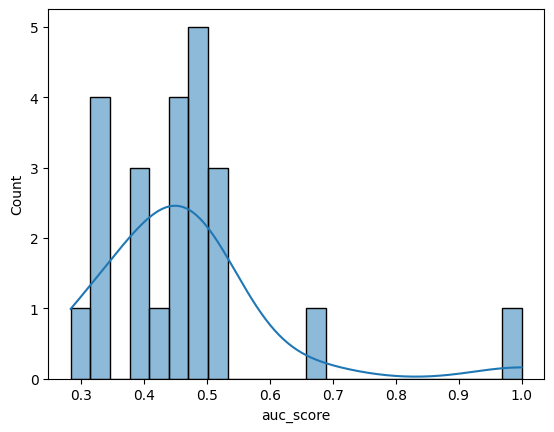

In [30]:
sns.histplot(auc_score_fi, x='auc_score', kde=True, bins = 23)
plt.pyplot.show()

Feature importance : Correlation 

In [31]:
dataset[numerical].corrwith(dataset.DRK_YN)

waistline          -0.092993
sight_left         -0.077379
sight_right        -0.074806
hear_left           0.058337
hear_right          0.058230
SBP                -0.033149
DBP                -0.100876
BLDS               -0.014713
tot_chole          -0.019720
HDL_chole          -0.042514
LDL_chole           0.043693
triglyceride       -0.104398
hemoglobin         -0.299341
urine_protein       0.003125
serum_creatinine   -0.060798
SGOT_AST           -0.039382
SGOT_ALT           -0.062908
gamma_GTP          -0.205094
SMK_stat_type_cd   -0.350784
age                 0.284587
height             -0.374566
weight             -0.264282
DRK_YN              1.000000
dtype: float64

Mutual Information of the categorical variable

In [32]:
mi_cat = mutual_info_score(dataset.DRK_YN, dataset.sex)
mi_cat

0.06963942000755813

In [33]:
dataset.sex.value_counts()

sex
Male      526415
Female    464931
Name: count, dtype: int64

SPLIT THE DATA INTO HALF

In [34]:
USE_NOW, USE_LATER = train_test_split(dataset, test_size=0.75, random_state=1)

PROCEED WITH 'TO_BE_USED'

In [35]:
Full_train, df_test = train_test_split(USE_NOW, test_size=0.20, random_state=1)
df_train, df_val = train_test_split(Full_train, test_size=0.25, random_state=1)

In [36]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [37]:
y_train = df_train.DRK_YN.values
y_test = df_test.DRK_YN.values
y_val = df_val.DRK_YN.values

In [38]:
del df_train['DRK_YN']
del df_test['DRK_YN']
del df_val['DRK_YN']

MODEL TRAINING

In [39]:
df_train.shape

(148701, 23)

In [40]:
df_train.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
dtype: int64

In [41]:
train_dict = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)


In [42]:
dv.get_feature_names_out()

array(['BLDS', 'DBP', 'HDL_chole', 'LDL_chole', 'SBP', 'SGOT_ALT',
       'SGOT_AST', 'SMK_stat_type_cd', 'age', 'gamma_GTP', 'hear_left',
       'hear_right', 'height', 'hemoglobin', 'serum_creatinine',
       'sex=Female', 'sex=Male', 'sight_left', 'sight_right', 'tot_chole',
       'triglyceride', 'urine_protein', 'waistline', 'weight'],
      dtype=object)

In [43]:
dt = DecisionTreeClassifier(max_depth=15)
dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=15)

In [44]:
val_dicts = df_val.to_dict(orient='records')

X_val = dv.transform(val_dicts)

y_pred = dt.predict(X_val)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [45]:
auc_val = roc_auc_score(y_val, y_pred)
print('val :',auc_val)
y_pred = dt.predict(X_train)
auc_train = roc_auc_score(y_train, y_pred)
print('train :',auc_train)


val : 0.6948468994022665
train : 0.8318768746557711


The model overfits at depth of None.


PARAMETER TUNING
- MAX DEPTH
- MIN SAMPLE LEAVES


In [46]:
auc_scores1 = []

for md in [1,2,3,4,5,6,10,15,20, None]:
    for min_L in [1, 2, 5, 10, 50, 100, 200, 300, 500]:
        dt = DecisionTreeClassifier(max_depth=md, min_samples_leaf=min_L)
        dt.fit(X_train, y_train) 
     
        val_pred = dt.predict(X_val)
        auc = roc_auc_score(y_val, val_pred)

        auc_scores1.append((md, min_L, auc))
        print(f'{md, min_L} -> {auc}')

In [ ]:
auc_scores1 = pd.DataFrame(auc_scores1, columns=['max_depths', 'min_sample_leaf', 'auc'])
auc_scores1

In [ ]:
auc_scores1.sort_values(by='auc', ascending=False).head()

In [ ]:
auc_score_pivot1 = auc_scores1.pivot(index='min_sample_leaf', columns=['max_depths'], values=['auc'] )
auc_score_pivot1.round(4)

In [ ]:
sns.heatmap(auc_score_pivot1, annot=True, fmt='.3f')

Based on the difference in auc, seems the best parameter for train is a max_depth of 10 and min sample leaf of 500.

FINAL FULL TRAIN AND TESTING OF Decision Tree Model

In [ ]:
Full_train = Full_train.reset_index(drop=True)
y_Full_train = Full_train.DRK_YN.values

del Full_train['DRK_YN']

Full_train_dict = Full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)

X_Full_train = dv.fit_transform(Full_train_dict)

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=500)
dt.fit(X_Full_train, y_Full_train)

In [ ]:
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_pred = dt.predict(X_test)
roc_auc_score(y_test, y_pred)


TRAIN MODEL USING RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_val)

roc_auc_score(y_val, y_pred)


- n_estimator
- random_state
- max_depth
- min_samples_leaf


In [ ]:
score_line = []
for d in [5, 10, 15]:
    for n in range(10, 200, 10):
        rf = RandomForestClassifier(criterion='gini', 
                                    n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)
        score_line.append((n, d, auc))

In [ ]:
score_line = pd.DataFrame(score_line, columns=['n_estimator', 'd', 'auc'])
score_line.sort_values(by='auc', ascending=False)


In [ ]:
score_line_pivot = score_line.pivot(index='n_estimator', columns=['d'], values=['auc'])

In [ ]:
sns.heatmap(score_line_pivot, annot=True, fmt='.3f')

Heat map shows max depth of 15 and n_estimator of 110

In [ ]:
max_depth = 15

In [ ]:
score_line2 = []


for s in [5, 10, 15]:
    for n in range(10, 200, 10):
        rf = RandomForestClassifier(n_estimators=n,  
                                     max_depth=max_depth,
                                     min_samples_leaf=s,
                                     random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        auc = roc_auc_score(y_val, y_pred)
        score_line2.append((n, s, auc))

In [ ]:
score_line2 = pd.DataFrame(score_line2, columns=['n', 's', 'auc'])
score_line2.sort_values(by='auc', ascending=False)